<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
titanic = pd.read_csv('../DATA/titanic_train.csv', index_col='PassengerId')

In [3]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Why would we want to set an index column based on `PassengerId`? 

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [4]:
# SHAPE OF THE DATA ( ROWS, COLUMNS )
titanic.shape

(891, 11)

In [5]:
# HEAD ( THE FIRST 5 ROWS )
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# TAIL ( THE LAST 5 ROWS )
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# SEEING IF THERE ARE MISSING VALUES IN EACH COLUMN
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### THERE IS MISSING VALUES IN EMBARKED, AGE AND CABIN

In [8]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, var, fill=True)  # Updated parameter from 'shade=True' to 'fill=True'
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show()

In [9]:
def bar_chart(train,feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind= 'bar', stacked=True, figsize=(10,5))

#### SEX SURVIVAL RATES

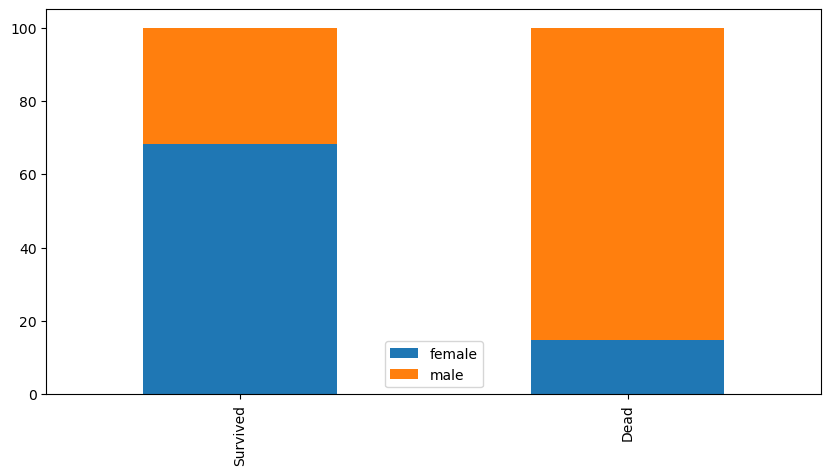

In [10]:
bar_chart(titanic, 'Sex')

In [11]:
#The percentage number of females and males are in the dataset
titanic.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [12]:
#How many females and males are in the dataset
titanic.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [13]:
#How many females and males have survived or not survived?
titanic.groupby(['Sex','Survived']).Name.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [14]:
# The percentage of no survival in female
81/314

0.25796178343949044

In [15]:
# The percentage of no survival in male
468/577

0.8110918544194108

#### PCLASS SURVIVAL RATES

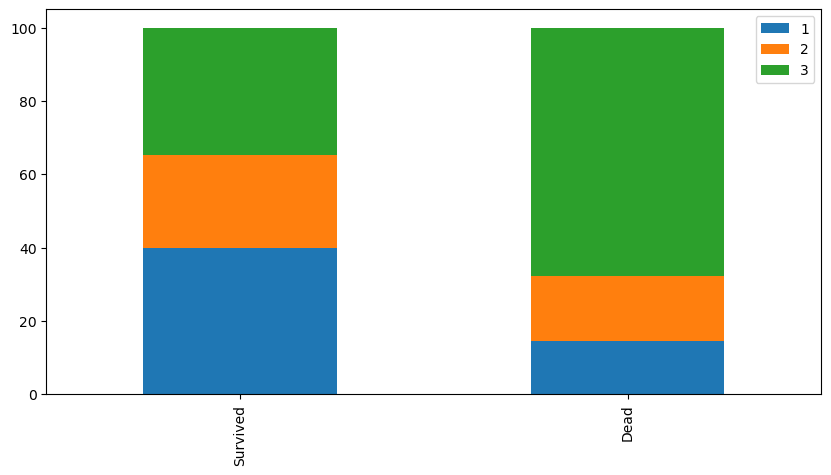

In [16]:
# PCLASS SURVIVAL RATES
bar_chart(titanic, 'Pclass')

In [18]:
#The percentage number of the three Pclasses
titanic.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [19]:
#How many people per Pclasses?
titanic.groupby('Pclass').Name.count()

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [20]:
#How many of the three Pclasses have survived or not survived?
titanic.groupby(['Pclass', 'Survived']).Name.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

#### EMBARKED SURVIVAL RATES

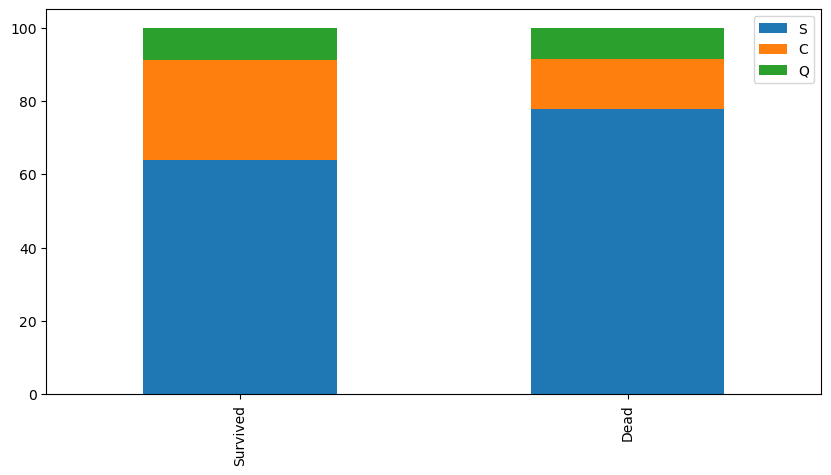

In [21]:
#EMBARKED SURVIVAL RATES
bar_chart(titanic, 'Embarked')

In [22]:
#How many people per Embarked
titanic.groupby('Embarked').Name.count()

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64

In [23]:
#How many of the three Embarked have survived or not survived?
titanic.groupby(['Embarked', 'Survived']).Name.count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Name, dtype: int64

#### FINDING THE MISSING VALUES IN AGE

In [24]:
#AGE
#Fill in the missing values by finding the median of Age by count of Sex
titanic.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [25]:
#Looking at an array of the median of Age by Sex
titanic.groupby('Sex')['Age'].transform("median")

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [26]:
#Fill the missing values in Age by using the median of age for each Sex 
titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform("median"),inplace=True)

#### AGE SURVIVAL RATES

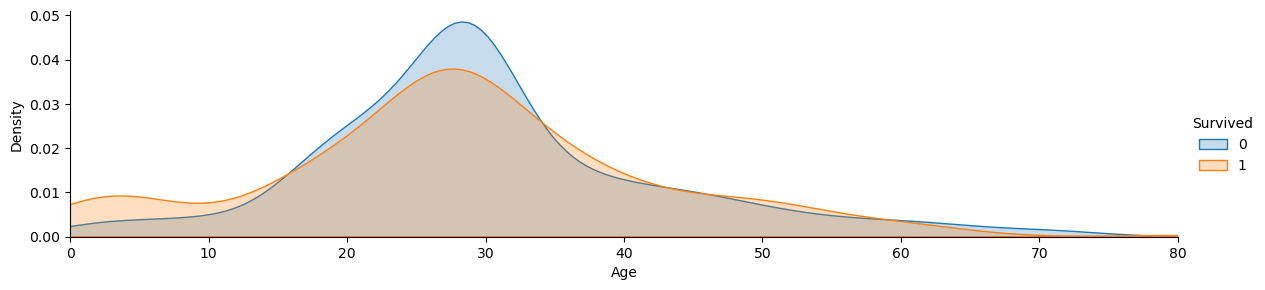

In [27]:
#AGE
facetgridplot(titanic, 'Age')

In [28]:
# How many people in Age
titanic.groupby('Age').Name.count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Name, Length: 88, dtype: int64

In [29]:
#How many of Age have survived or not survived?
titanic.groupby(['Age', 'Survived']).Name.count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Name, Length: 142, dtype: int64

#### FARE SURVIVAL RATES

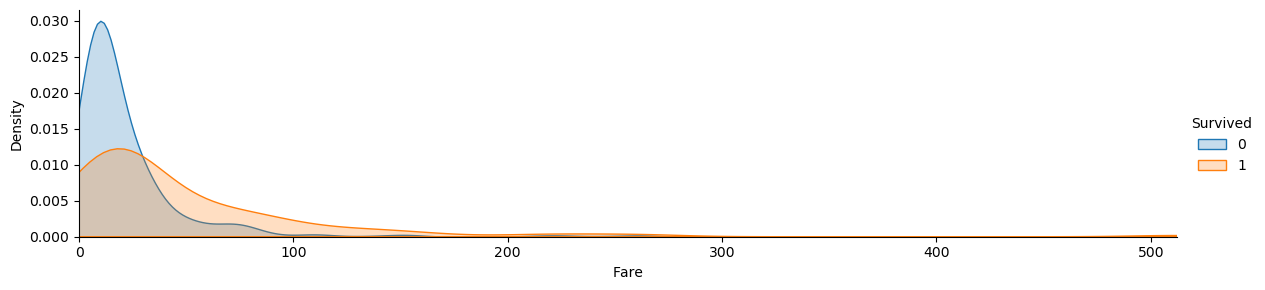

In [30]:
#FARE
facetgridplot(titanic, 'Fare')

In [31]:
# How many people in Fare
titanic.groupby('Fare').Name.count()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Name, Length: 248, dtype: int64

In [32]:
#How many of Fare have survived or not survived?
titanic.groupby(['Fare', 'Survived']).Name.count()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Name, Length: 330, dtype: int64

#### FINDING THE MISSING VALUES IN EMBARKED

In [33]:
#Fill in the missing values with 'S' as most people embarked from there
titanic['Embarked'].fillna('S', inplace = True)

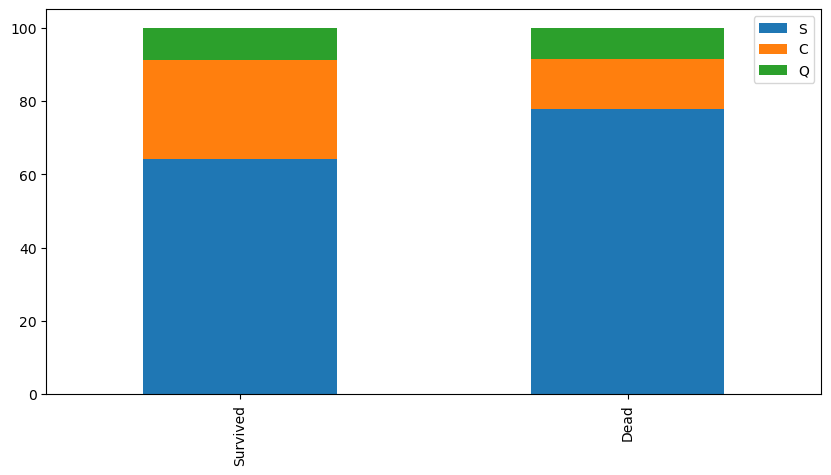

In [34]:
bar_chart(titanic, 'Embarked')

In [35]:
#How many people per Embarked
titanic.groupby('Embarked').Name.count()

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64

In [36]:
#How many of the three Embarked have survived or not survived?
titanic.groupby(['Embarked', 'Survived']).Name.count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Name, dtype: int64

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [37]:
# ANSWER
feature_columns= ['Pclass','Parch']
x= titanic[feature_columns]
y= titanic['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [38]:
# ANSWER
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) 

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [39]:
# ANSWER
# Create Model
logreg=LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [40]:
# ANSWER
# Fit Model
logreg.fit(x_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [41]:
# ANSWER
logreg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [42]:
# ANSWER
logreg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [43]:
# ANSWER
print(set(zip(feature_columns, logreg.coef_[0])))

{('Parch', 0.33788800487797466), ('Pclass', -0.8723906606017792)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [44]:
for col in zip(x_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [45]:
# ANSWER
print('accuracy_score ={:7.4f}'.format(logreg.score(x_train, y_train)))

accuracy_score = 0.6901


What is the  `accuracy_score` for the test data?

In [46]:
# ANSWER
print('accuracy_score ={:7.4f}'.format(logreg.score(x_test, y_test)))

accuracy_score = 0.6682


What can we say about this result?

ANSWER
- test set has predicted that almost as well as train set 
- overfitting data is highly unlikely

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [47]:
# ANSWER
titanic['Age'].fillna(titanic.Age.mean(), inplace=True)
feature_columns= ['Pclass', 'Parch', 'Age']
x= titanic[feature_columns]

In [48]:
# Build Model
logreg= LogisticRegression()

In [49]:
# Fit Model
logreg.fit(x_train, y_train)

LogisticRegression()

In [50]:
# Score
logreg_score =logreg.score(x_train, y_train)
print('accuracy_score ={:1.4f}'.format(logreg_score))

accuracy_score =0.6901


So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- Age is dependent of other features already in the model
- Age is not related to Titanic survival
- Filling in the missing values of age might of distorted the distribution of age too much

Let's see where the model is going wrong by showing the Confusion Matrix:

In [51]:
from sklearn import metrics

In [52]:
# ANSWER
y_pred_class = logreg.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


Nb. Here is how `confusion_matrix` arranges its output:

In [53]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: False negative: The number of positive instances incorrectly predicted as negative.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [54]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(x_test)[:,1]

In [55]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

In [56]:
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

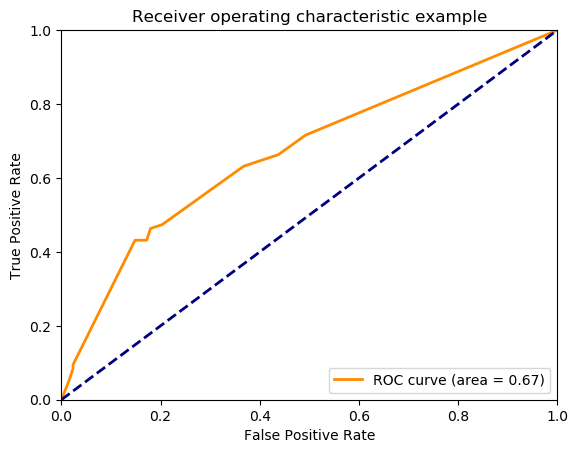

In [57]:
# Plot the ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [58]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [59]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [60]:
def get_logreg_score(data, feature_cols, target_col):
    x = data[feature_columns]
    y = data[target_column]

    # Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(x_train, y_train)

    # Score
    logreg_score = logreg.score(x_test, y_test)

    # Predict
    logreg_preds = logreg.predict(x_test)

    # Predict probability

    logreg_pred_proba = logreg.predict_proba(x_test)[:,1]

    # Return accuracy rate
    return logreg_score, logreg_preds, logreg_pred_proba

In [61]:
# ANSWER
# Set Feature Both Numerical, Categorical
target_column = 'Survived'
feature_columns = ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
get_logreg_score(titanic_with_dummies, feature_columns, target_column)

(0.6547085201793722,
 array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0], dtype=int64),
 array([0.50289539, 0.20063459, 0.60123399, 0.21371   , 0.82211732,
        0.25657931, 0.5881344 , 0.57038759, 0.63694471, 0.17531297,
        0.22739513, 0.22047643, 0.44341846, 0.48321793, 0.21371   ,
   

Plot the ROC curve for the new model:

In [62]:
# ANSWER
def plot_roc_curve(x_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(x_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

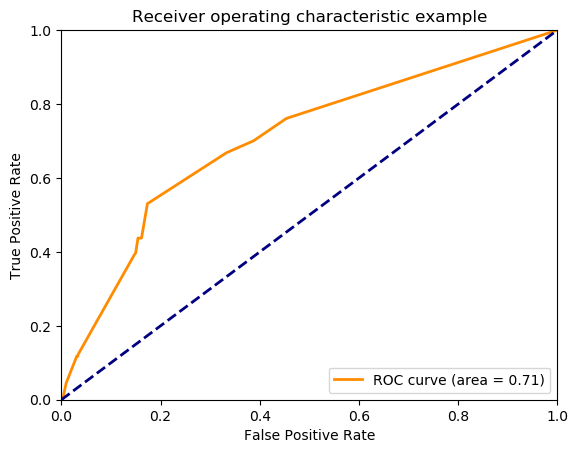

In [63]:
# Train
plot_roc_curve(x_train, y_train)

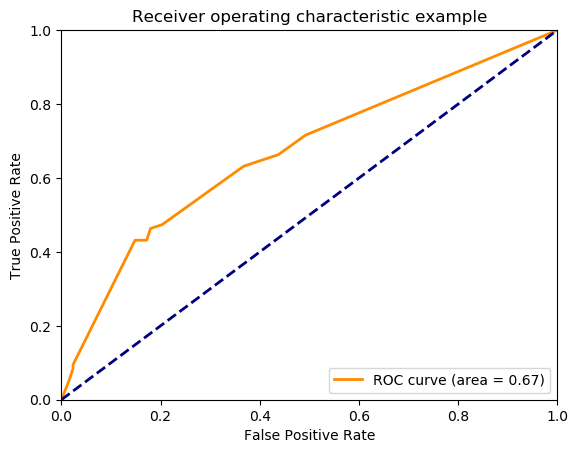

In [64]:
# Test
plot_roc_curve(x_test, y_test)

Can we improve the model by including the remaining features?

In [65]:
target_column = 'Survived'
feature_columns = ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
get_logreg_score(titanic_with_dummies, feature_columns, target_column)

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(0.8026905829596412,
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0], dtype=int64),
 array([0.82194911, 0.08186901, 0.88644828, 0.65958784, 0.93002018,
        0.11111414, 0.22398404, 0.8505298 , 0.51884044, 0.57208886,
        0.09549772, 0.572687  , 0.2198983 , 0.26285076, 0.65945084,
   

In [66]:
ttwd = titanic_with_dummies
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
                                            100 * ttwd[ttwd.Sex_male == 1].Survived.mean(), ttwd.Sex_male.sum(), 
                                            100 * ttwd[ttwd.Sex_female == 1].Survived.mean(), ttwd.Sex_female.sum(),
                                            100 * ttwd[ttwd.Age < 16].Survived.mean(), len(ttwd[ttwd.Age < 16])))

Male survival: 18.89% of 577
Female survival: 74.20% of 314
Child survival: 59.04% of 83


In [67]:
x = titanic_with_dummies[feature_columns]
y = titanic_with_dummies[target_column]

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(x_train, y_train)

# Make a data frame of results, including actual and predicted response:
y_hat = logreg.predict(x)
y_hats = pd.Series(y_hat, index = x.index)
y_hatdf = pd.DataFrame({'y_hat': y_hats})
y_actuals = pd.Series(y, index = x.index)    # names 'y', 'y_test' are in use
y_actualdf = pd.DataFrame({'y_actual': y_actuals})   
ttall = y_hatdf.join(y_actualdf).join(x)
ttall.head()

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,y_hat,y_actual,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [68]:
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
                                                    100 * ttall[ttall.Sex_male == 1].y_hat.mean(), ttall.Sex_male.sum(), 
                                                    100 * ttall[ttall.Sex_female == 1].y_hat.mean(), ttall.Sex_female.sum(),
                                                    100 * ttall[ttall.Age < 16].y_hat.mean(), len(ttall[ttall.Age < 16])))

Male survival:  5.55% of 577
Female survival: 86.31% of 314
Child survival: 49.40% of 83


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

#### 1. Removing random_state parameter 

In [69]:
def get_logreg_score(data, feature_cols, target_col):
    x = data[feature_columns]
    y = data[target_column]

    # Split
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(x_train, y_train)

    # Score
    logreg_score = logreg.score(x_test, y_test)

    # Predict
    logreg_preds = logreg.predict(x_test)

    # Predict probability

    logreg_pred_proba = logreg.predict_proba(x_test)[:,1]

    # Return accuracy rate
    return logreg_score, logreg_preds, logreg_pred_proba

In [70]:
# ANSWER
# Set Feature Both Numerical, Categorical
target_column = 'Survived'
feature_columns = ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
get_logreg_score(titanic_with_dummies, feature_columns, target_column)

(0.7533632286995515,
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1], dtype=int64),
 array([0.14777829, 0.32422632, 0.35269452, 0.37642209, 0.78098706,
        0.37931811, 0.29680744, 0.22409621, 0.44672099, 0.29680744,
        0.37500705, 0.17267261, 0.576326  , 0.60249143, 0.82749211,
   

In [71]:
# ANSWER
def plot_roc_curve(x_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(x_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

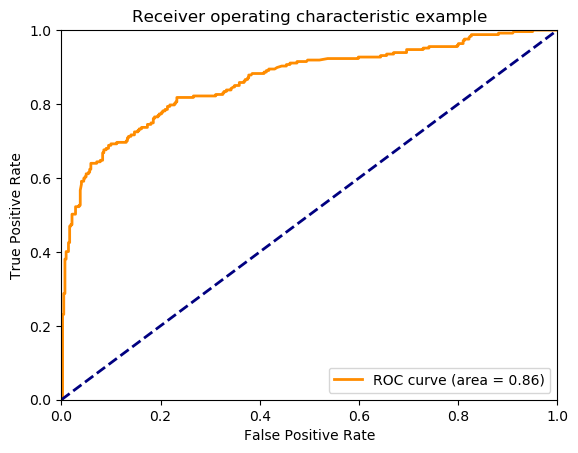

In [72]:
# Train
plot_roc_curve(x_train, y_train)

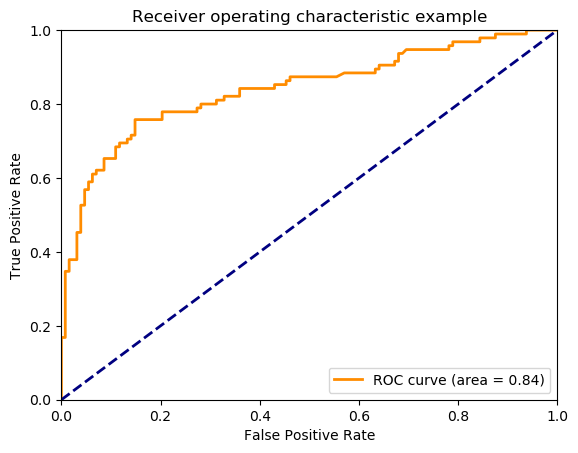

In [73]:
# Test
plot_roc_curve(x_test, y_test)

 #### 2. Use Cross-Validation: Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

In [74]:
from sklearn.model_selection import cross_val_score
target_column = 'Survived'
feature_columns = ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression()
scores = cross_val_score(logreg, titanic_with_dummies[feature_columns], titanic_with_dummies[target_column], cv=5)
scores.mean()

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

0.793496955621116

#### 3. Look at the fpr & tpr vectors for the best model.

In [75]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(x_train, y_train)

# Predict
y_pred_class = logreg.predict(x_test)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[113  15]
 [ 29  66]]


C:\Users\britn\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Classification Accuracy:** Overall, how often is the classifier correct?

In [76]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8026905829596412
0.8026905829596412


**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [77]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.19730941704035873
0.19730941704035876


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

In [78]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6947368421052632
0.6947368421052632


**Specificity:** When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [79]:
specificity = TN / (TN + FP)

print(specificity)

0.8828125


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect

In [80]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1171875
0.1171875


**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [81]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.8148148148148148
0.8148148148148148




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



